Criar ambiente para a prática

- Python 3.8: conda create -n NLP python=3.8
- Ativar ambiente criado: !conda activate NLP
- Instalar NLTK: !pip install nltk
- Instalar GemSim: !pip install --upgrade gensim
- Instalar scikit-learn: !pip install sklearn

In [ ]:
!conda activate NLP
!pip install nltk
!pip install --upgrade gensim
!pip install sklearn

/bin/bash: conda: command not found
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 24.1 MB 1.2 MB/s 
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=57399e44068fe4dd93f8816e3ff24e95fb110f0957787a13c9bc4546be3c6a34
  Stored in directory: /root/.cache/pip/wheels/46/ef/c3/157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built sklearn


# Obter base de dados textual 'fetch_20newsgroups' do Scikit-Learn

In [ ]:
from sklearn.datasets import fetch_20newsgroups

print(fetch_20newsgroups.__doc__)

Load the filenames and data from the 20 newsgroups dataset (classification).

    Download it if necessary.

    =================   ==========
    Classes                     20
    Samples total            18846
    Dimensionality               1
    Features                  text
    =================   ==========

    Read more in the :ref:`User Guide <20newsgroups_dataset>`.

    Parameters
    ----------
    data_home : str, default=None
        Specify a download and cache folder for the datasets. If None,
        all scikit-learn data is stored in '~/scikit_learn_data' subfolders.

    subset : {'train', 'test', 'all'}, default='train'
        Select the dataset to load: 'train' for the training set, 'test'
        for the test set, 'all' for both, with shuffled ordering.

    categories : array-like, dtype=str, default=None
        If None (default), load all the categories.
        If not None, list of category names to load (other categories
        ignored).

    shuffle : 

In [ ]:
raw_documents = fetch_20newsgroups(subset='all', return_X_y=True)

In [ ]:
categories = set(raw_documents[1])
print('Quais são as categorias de documento? ', categories)

documents = raw_documents[0]
print('====== Documento 0:5 ======')
for d in documents[:5]:
    print(d)

Quais são as categorias de documento?  {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19}
====== Documento 0:5 ======
From: Mamatha Devineni Ratnam <mr47+@andrew.cmu.edu>
Subject: Pens fans reactions
Organization: Post Office, Carnegie Mellon, Pittsburgh, PA
Lines: 12
NNTP-Posting-Host: po4.andrew.cmu.edu



I am sure some bashers of Pens fans are pretty confused about the lack
of any kind of posts about the recent Pens massacre of the Devils. Actually,
I am  bit puzzled too and a bit relieved. However, I am going to put an end
to non-PIttsburghers' relief with a bit of praise for the Pens. Man, they
are killing those Devils worse than I thought. Jagr just showed you why
he is much better than his regular season stats. He is also a lot
fo fun to watch in the playoffs. Bowman should let JAgr have a lot of
fun in the next couple of games since the Pens are going to beat the pulp out of Jersey anyway. I was very disappointed not to see the Islanders lose the final
regu

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer(stop_words='english')
count_vect.fit(documents)

CountVectorizer(stop_words='english')

In [ ]:
len(count_vect.vocabulary_)

173451

In [ ]:
counter = 0
for _, count in count_vect.vocabulary_.items():
    counter += count
    
print('Quantidade total de palavras: ', counter)

Quantidade total de palavras:  15042537975


# Obter base de treino

In [ ]:
# del raw_documents
raw_documents_train = fetch_20newsgroups(subset='train', return_X_y=True)

In [ ]:
categories = set(raw_documents_train[1])
print('Quais são as categorias de documento? ', categories)

documents = raw_documents_train[0]
print('====== Documento 0:5 ======')
for d in documents[:5]:
    print(d)
    
print('Quantidade de Documentos de Treino: ', len(documents))

Quais são as categorias de documento?  {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19}
====== Documento 0:5 ======
From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----





From: guykuo@carson.u.washington.edu (Guy Kuo)
Subject: SI Clock Poll - Final Call
Summary: Final call for SI clock reports
Keywords: SI,acc

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer(stop_words='english')
count_vect.fit(documents)

CountVectorizer(stop_words='english')

In [ ]:
print('Tamanho do vocabulário: ', len(count_vect.vocabulary_))
counter = 0
for _, count in count_vect.vocabulary_.items():
    counter += count
    
print('Quantidade total de palavras: ', counter)

Tamanho do vocabulário:  129796
Quantidade total de palavras:  8423435910


In [ ]:
for i, (token, count) in enumerate(count_vect.vocabulary_.items()):
    if i > 9:
        break
    print(token, count)

lerxst 75215
wam 122887
umd 118013
edu 50455
thing 114439
subject 111094
car 37722
nntp 87451
posting 94962
host 63970


In [ ]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

from nltk.corpus import stopwords
nltk.download('stopwords')
list_stop = stopwords.words('english')

documents_tokens = []
for doc in documents:
    documents_tokens.append(
        [token.lower() for token in word_tokenize(doc, language='english') if not token.lower()  in list_stop]
    )

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
pre_processed_documents = [' '.join(doc) for doc in documents_tokens]
print(pre_processed_documents[0])

: lerxst @ wam.umd.edu ( 's thing ) subject : car ! ? nntp-posting-host : rac3.wam.umd.edu organization : university maryland , college park lines : 15 wondering anyone could enlighten car saw day . 2-door sports car , looked late 60s/ early 70s . called bricklin . doors really small . addition , front bumper separate rest body . know . anyone tellme model name , engine specs , years production , car made , history , whatever info funky looking car , please e-mail . thanks , - il -- -- brought neighborhood lerxst -- --


In [ ]:
count_vect = CountVectorizer(stop_words=None, min_df=0.005, max_df=0.5, max_features=3000)
count_vect.fit(pre_processed_documents)

CountVectorizer(max_df=0.5, max_features=3000, min_df=0.005)

In [ ]:
print('Tamanho do vocabulário: ', len(count_vect.vocabulary_))
counter = 0
for _, count in count_vect.vocabulary_.items():
    counter += count
    
print('Quantidade total de palavras: ', counter)

Tamanho do vocabulário:  3000
Quantidade total de palavras:  4498500


# Análise do vocabulário com 3k tokens

In [ ]:
sorted(count_vect.vocabulary_.items(), reverse=True)

[('zuma', 2999),
 ('zoo', 2998),
 ('zone', 2997),
 ('zip', 2996),
 ('zero', 2995),
 ('young', 2994),
 ('york', 2993),
 ('yet', 2992),
 ('yesterday', 2991),
 ('yes', 2990),
 ('years', 2989),
 ('year', 2988),
 ('yeah', 2987),
 ('yale', 2986),
 ('xterm', 2985),
 ('xt', 2984),
 ('xlib', 2983),
 ('x11r5', 2982),
 ('x11', 2981),
 ('wrote', 2980),
 ('wrong', 2979),
 ('written', 2978),
 ('writing', 2977),
 ('write', 2976),
 ('wright', 2975),
 ('wpi', 2974),
 ('wpd', 2973),
 ('would', 2972),
 ('worth', 2971),
 ('worst', 2970),
 ('worship', 2969),
 ('worse', 2968),
 ('worry', 2967),
 ('world', 2966),
 ('works', 2965),
 ('working', 2964),
 ('worked', 2963),
 ('work', 2962),
 ('words', 2961),
 ('word', 2960),
 ('wood', 2959),
 ('wondering', 2958),
 ('wonder', 2957),
 ('women', 2956),
 ('woman', 2955),
 ('wo', 2954),
 ('witnesses', 2953),
 ('without', 2952),
 ('within', 2951),
 ('wish', 2950),
 ('wise', 2949),
 ('wisdom', 2948),
 ('wisconsin', 2947),
 ('wiretap', 2946),
 ('wire', 2945),
 ('wins', 2

# Limpeza de tokens não relevantes

In [ ]:
custom_list_stop = ['xterm', 'x11r5', 'x11', 'xlib', 'vax', 'uwo', 'pl8', 'pl9']

documents_tokens = []
for doc in pre_processed_documents:
    documents_tokens.append(
        [token for token in word_tokenize(doc, language='english') if not token in custom_list_stop]
    )

del pre_processed_documents
pre_processed_documents = [' '.join(doc) for doc in documents_tokens]

# Recriar vocabulário

In [ ]:
count_vect = CountVectorizer(stop_words=None, min_df=0.005, max_df=0.5, max_features=3000)
count_vect.fit(pre_processed_documents)

CountVectorizer(max_df=0.5, max_features=3000, min_df=0.005)

In [ ]:
print('Tamanho do vocabulário: ', len(count_vect.vocabulary_))
counter = 0
for _, count in count_vect.vocabulary_.items():
    counter += count
    
print('Quantidade total de palavras: ', counter)

Tamanho do vocabulário:  3000
Quantidade total de palavras:  4498500


In [ ]:
# ['xterm', 'x11r5', 'x11', 'xlib', 'vax', 'uwo', 'pl8', 'pl9']
sorted(count_vect.vocabulary_.items(), reverse=True)

[('zuma', 2999),
 ('zoo', 2998),
 ('zone', 2997),
 ('zip', 2996),
 ('zero', 2995),
 ('young', 2994),
 ('york', 2993),
 ('yet', 2992),
 ('yesterday', 2991),
 ('yes', 2990),
 ('years', 2989),
 ('year', 2988),
 ('yeah', 2987),
 ('yale', 2986),
 ('xt', 2985),
 ('wrote', 2984),
 ('wrong', 2983),
 ('written', 2982),
 ('writing', 2981),
 ('write', 2980),
 ('wright', 2979),
 ('wpi', 2978),
 ('wpd', 2977),
 ('would', 2976),
 ('worth', 2975),
 ('worst', 2974),
 ('worship', 2973),
 ('worse', 2972),
 ('worry', 2971),
 ('world', 2970),
 ('works', 2969),
 ('working', 2968),
 ('worked', 2967),
 ('work', 2966),
 ('words', 2965),
 ('word', 2964),
 ('wood', 2963),
 ('wondering', 2962),
 ('wonder', 2961),
 ('women', 2960),
 ('woman', 2959),
 ('wo', 2958),
 ('witnesses', 2957),
 ('without', 2956),
 ('within', 2955),
 ('wish', 2954),
 ('wise', 2953),
 ('wisdom', 2952),
 ('wisconsin', 2951),
 ('wiretap', 2950),
 ('wire', 2949),
 ('wins', 2948),
 ('winnipeg', 2947),
 ('winning', 2946),
 ('wings', 2945),
 ('w

# Extração de características TF-IDF

In [ ]:
X = count_vect.transform(pre_processed_documents)

In [ ]:
print(X[0, :])

  (0, 24)	1
  (0, 192)	1
  (0, 270)	2
  (0, 443)	1
  (0, 474)	1
  (0, 504)	1
  (0, 518)	5
  (0, 632)	1
  (0, 720)	1
  (0, 782)	1
  (0, 889)	1
  (0, 914)	1
  (0, 958)	1
  (0, 1159)	1
  (0, 1300)	1
  (0, 1322)	1
  (0, 1354)	1
  (0, 1383)	1
  (0, 1496)	1
  (0, 1516)	1
  (0, 1598)	1
  (0, 1599)	1
  (0, 1620)	1
  (0, 1623)	1
  (0, 1650)	1
  (0, 1729)	1
  (0, 1783)	1
  (0, 1828)	1
  (0, 1944)	1
  (0, 2026)	1
  (0, 2058)	1
  (0, 2106)	1
  (0, 2191)	1
  (0, 2264)	1
  (0, 2335)	1
  (0, 2396)	1
  (0, 2480)	1
  (0, 2524)	1
  (0, 2535)	1
  (0, 2685)	1
  (0, 2689)	1
  (0, 2795)	2
  (0, 2811)	1
  (0, 2927)	1
  (0, 2962)	1
  (0, 2989)	1


In [ ]:
count_vect.get_feature_names_out()[518]

'car'

In [ ]:
X.shape

(11314, 3000)

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer()
tfidf_transformer.fit(X)

TfidfTransformer()

In [ ]:
X_tfidf = tfidf_transformer.transform(X)
print(X_tfidf[0,:])

  (0, 2989)	0.08840365122530766
  (0, 2962)	0.12953224410501987
  (0, 2927)	0.11968098149575063
  (0, 2811)	0.05408153282754128
  (0, 2795)	0.30896178819432407
  (0, 2689)	0.09061820712401654
  (0, 2685)	0.08036703627795636
  (0, 2535)	0.15762850358922614
  (0, 2524)	0.15814584710955218
  (0, 2480)	0.10974996136351398
  (0, 2396)	0.143927814536628
  (0, 2335)	0.12341128132556274
  (0, 2264)	0.11915880270899802
  (0, 2191)	0.08263402087840323
  (0, 2106)	0.15788597777783142
  (0, 2058)	0.05026873736229992
  (0, 2026)	0.08087156983026264
  (0, 1944)	0.14456274531552685
  (0, 1828)	0.052019365239239834
  (0, 1783)	0.10208520883489906
  (0, 1729)	0.12897536682702238
  (0, 1650)	0.1594827410349858
  (0, 1623)	0.08734855030163333
  (0, 1620)	0.0924459820484167
  (0, 1599)	0.10074897090156865
  (0, 1598)	0.13177611041635326
  (0, 1516)	0.1344386719347759
  (0, 1496)	0.0624261804819222
  (0, 1383)	0.10665008134616312
  (0, 1354)	0.14269967163635183
  (0, 1322)	0.051653427506920396
  (0, 1300)	

In [ ]:
X_tfidf.shape

(11314, 3000)

# Modelagem de tópicos usando SVD

A quantidade de tópicos pode ser analisada pela variabilidade explicada.

In [ ]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=600, n_iter=10 , random_state=0)
svd.fit(X_tfidf)

TruncatedSVD(n_components=600, n_iter=10, random_state=0)

In [ ]:
print('Total de variabilidade explicada: ', sum(svd.explained_variance_ratio_))

Total de variabilidade explicada:  0.5917790151921133


# Matrizes do LSA

Criar figura heatmap com os componentes do SVD. Com ela, você consegue visualizar quais são os termos mais importantes dentro de cada tópico

In [ ]:
import numpy as np

# topics x tokens
V = svd.components_
print(V.shape)

# top 3 tokens mais importantes do tópico k
m = 10
k = 29
tokens_t_k = np.argsort(V[k,:])[-m:][::-1]
print('ids: ', tokens_t_k)
print(f'Tópico {k}: ', count_vect.get_feature_names_out()[tokens_t_k])

(600, 3000)
ids:  [1330  150  151 1290 2715 1818 2732 2862 1291 1929]
Tópico 29:  ['hp' '__' '___' 'henry' 'tin' 'newsreader' 'toronto' 'version' 'hewlett'
 'packard']


In [ ]:
S = svd.singular_values_
print(S.shape)

(120,)


In [ ]:
X_lsa = svd.transform(X_tfidf) # Matriz U do SVD => documentos x tópicos

# Para entender os tópicos de um documento, liste os mais importantes, em seguida substitua o id do tópico pelos top-k tokens desse tópico.

In [ ]:
# top 3 tópicos mais importantes do documento d
t = 3
d = 12
topics_t_d = np.argsort(X_lsa[d,:])[-t:][::-1]
print(pre_processed_documents[d])
print('Tópicos: ', topics_t_d)
print(X_lsa[d,topics_t_d])

print('\nDescrição do documento ', d, ':')
m = 15
for topic in topics_t_d:
  tokens_t_k = np.argsort(V[topic,:])[-m:][::-1]
  print(f'Tópico {topic}: ', count_vect.get_feature_names_out()[tokens_t_k])

: rodc @ fc.hp.com ( rod cerkoney ) subject : * $ g4qxf , fekvh6 nntp-posting-host : hpfcmrc.fc.hp.com organization : hewlett packard , fort collins , co x-newsreader : tin [ version 1.1 pl8.5 ] lines : 15 -- regards , rod cerkoney /\ ______________________________________________ /~~\ / \ rod cerkoney ms 37 email : / \ hewlett packard rodc @ fc.hp.com /\ / \ 3404 east harmony rd . hpdesk : / \/ \ /\ fort collins , co 80525 hp4000/ux / \ \ / \ _____________________________________________/ \ \/ \__
Tópicos:  [29 30  2]
[0.35970573 0.28181478 0.17882313]

Descrição do documento  12 :
Tópico 29:  ['hp' '__' '___' 'henry' 'tin' 'newsreader' 'toronto' 'version' 'hewlett'
 'packard' 'files' 'file' 'space' 'de' 'zoo']
Tópico 30:  ['hp' 'georgia' 'netcom' 'ai' 'michael' 'uga' 'gatech' 'de' 'prism'
 'apple' 'tin' 'sandvik' 'newsreader' 'athens' 'israel']
Tópico 2:  ['com' 'netcom' 'key' 'clipper' 'encryption' 'chip' 'hp' 'government'
 'inc' 'access' 'digex' 'article' 'escrow' 'stratus' 'att']


In [ ]:
X_lsa_copy = X_lsa.copy()

# Selecionando os 't' tópicos mais relevantes para toda a base
X_lsa_copy.sort()
X_lsa_copy = X_lsa_copy[:, :t]
X_lsa_copy.shape

(11314, 3)

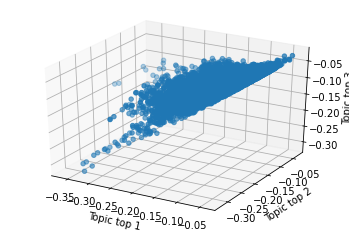

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X_lsa_copy[:,0], X_lsa_copy[:,1], X_lsa_copy[:,2], marker='o')

ax.set_xlabel('Topic top 1')
ax.set_ylabel('Topic top 2')
ax.set_zlabel('Topic top 3')

plt.show()

(11314, 3)


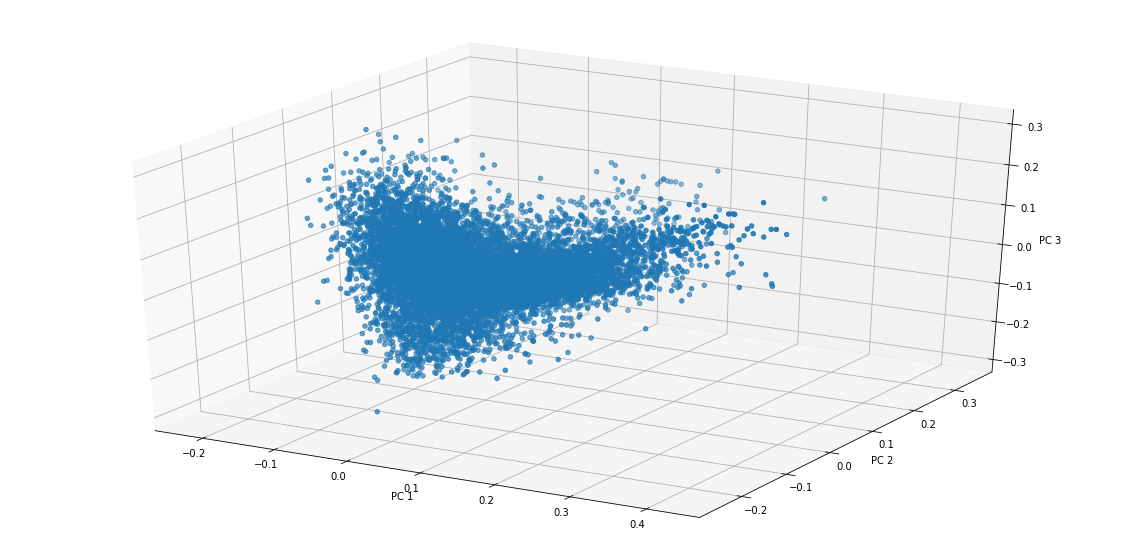

In [ ]:
# Aplicando PCA para análise semântica dos documentos
from sklearn.decomposition import PCA

X_lsa_3d = PCA(n_components=3, random_state=0).fit_transform(X_lsa)
print(X_lsa_3d.shape)

fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(projection='3d')
ax.scatter(X_lsa_3d[:,0], X_lsa_3d[:,1], X_lsa_3d[:,2], marker='o')

ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_zlabel('PC 3')

plt.show()

In [ ]:
# Análise dos Principais Componentes das Características TF-IDF --> TF-IDF é esparso... PCA não comporta esse tipo de dado

X_tfidf_3d = PCA(n_components=3, random_state=0).fit_transform(X_tfidf)
print(X_tfidf_3d.shape)

fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(projection='3d')
ax.scatter(X_tfidf_3d[:,0], X_tfidf_3d[:,1], X_tfidf_3d[:,2], marker='o')

ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_zlabel('PC 3')

plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


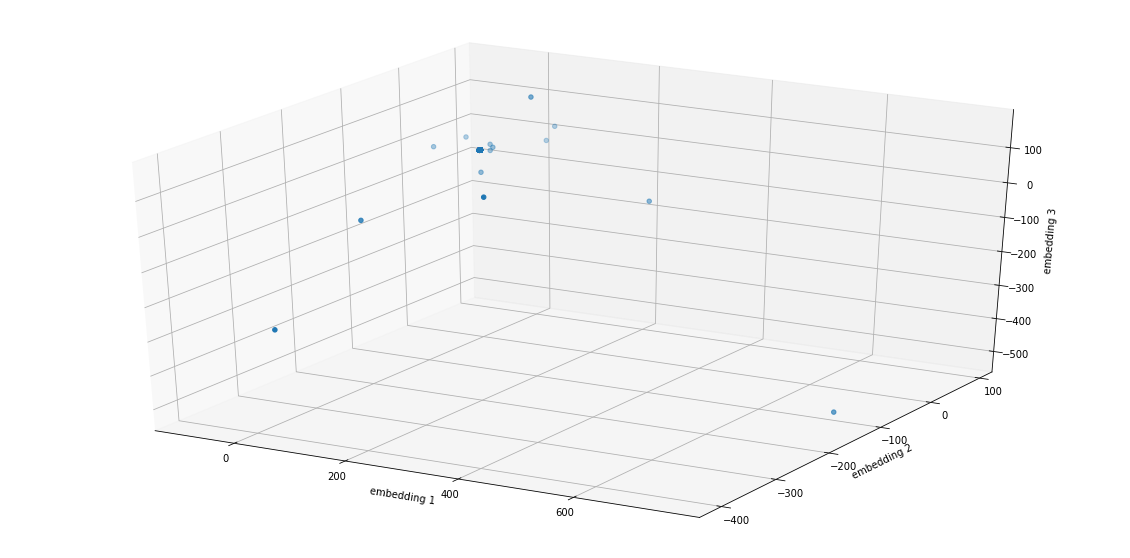

In [ ]:
from sklearn.manifold import TSNE

X_lsa_3d_tsne = TSNE(n_components=3, n_iter=250).fit_transform(X_lsa)

fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(projection='3d')
ax.scatter(X_lsa_3d_tsne[:,0], X_lsa_3d_tsne[:,1], X_lsa_3d_tsne[:,2], marker='o')

ax.set_xlabel('embedding 1')
ax.set_ylabel('embedding 2')
ax.set_zlabel('embedding 3')

plt.show()

# Transformando o texto de uma query em vetores de características

In [ ]:
# Pre processamento
final_list_stop_words = list_stop + custom_list_stop
query = 'could enlighten car saw day'

query_tokens = [token for token in word_tokenize(query, language='english') if not token in final_list_stop_words]
print(query_tokens)
pre_processed_query = ' '.join(query_tokens)
print(pre_processed_query)

# Extração de características de contagem
X_query = count_vect.transform([pre_processed_query])
print('1a etapa de extração de características')
print(X_query)

# Extração de características de frequência TF-IDF
X_tfidf_query = tfidf_transformer.transform(X_query)
print('2a etapa de extração de características')
print(X_tfidf_query)

# Extração dos embeddings da query
X_lsa_query = svd.transform(X_tfidf_query)
print('3a etapa de extração de características')
print(X_lsa_query)



['could', 'enlighten', 'car', 'saw', 'day']
could enlighten car saw day
1a etapa de extração de características
  (0, 518)	1
  (0, 720)	1
  (0, 782)	1
  (0, 2335)	1
2a etapa de extração de características
  (0, 2335)	0.6030829492859906
  (0, 782)	0.4718785428991316
  (0, 720)	0.3438389821078469
  (0, 518)	0.5435037731377248
3a etapa de extração de características
[[ 8.31142035e-02  3.16354163e-02  1.04082001e-02  4.93153511e-02
   8.63958621e-03 -5.13809851e-02 -2.54795355e-02 -1.34665664e-02
   1.38609825e-02  3.53352301e-02  9.65430838e-02 -8.04737969e-02
  -9.14854619e-02  4.67671195e-02 -3.56891592e-02  5.08582808e-02
   1.00433174e-01 -1.84180881e-03 -1.39575275e-02  7.64131801e-03
   7.74730056e-02  6.59557776e-02 -1.33913158e-02 -4.54020808e-02
  -2.20957035e-02 -7.73525021e-02  3.78872560e-03 -5.81601533e-02
  -4.54251822e-03 -4.89029190e-02  1.00428496e-02 -3.12796885e-02
   1.17637513e-02 -1.06037446e-01  3.95290437e-02 -4.14009527e-02
  -1.23820783e-01 -3.54695839e-02  1.010

# Recuperar documentos mais relevantes dada uma query

In [ ]:
print(X_lsa_query.shape)

(1, 600)


In [ ]:
from sklearn.metrics import pairwise_distances
import numpy

# Matriz de vetores dos documentos -> X_lsa
# Vetor da query -> X_lsa_query
# Recuperar k documentos mais relevantes a query
k = 3

ouput_distances = pairwise_distances(X_lsa, X_lsa_query, metric='euclidean')[:,0]
sorted_distances = list(sorted(ouput_distances))[:k]
sorted_indexes = list(numpy.argsort(ouput_distances)[:k])

print(query)
for id_doc, dist in zip(sorted_indexes, sorted_distances):
    print('Doc id: ', id_doc, ' Distance: ', dist)

could enlighten car saw day
Doc id:  0  Distance:  0.7109435931904234
Doc id:  8266  Distance:  0.7409744294527703
Doc id:  1082  Distance:  0.7536541524654018


In [ ]:
# Matriz de vetores dos documentos -> X_tfidf
# Vetor da query -> X_tfidf_query
# Recuperar k documentos mais relevantes a query
k = 3

ouput_distances = pairwise_distances(X_tfidf, X_tfidf_query, metric='euclidean')[:,0]
sorted_distances = list(sorted(ouput_distances))[:k]
sorted_indexes = list(numpy.argsort(ouput_distances)[:k])

print('Distância usando TF-IDF')
print(query)
for id_doc, dist in zip(sorted_indexes, sorted_distances):
    print('Doc id: ', id_doc, ' Distance: ', dist)

Distância usando TF-IDF
could enlighten car saw day
Doc id:  0  Distance:  1.0522104672706076
Doc id:  8013  Distance:  1.1022427904099314
Doc id:  8266  Distance:  1.1239278969351636


In [ ]:
# Matriz de vetores dos documentos -> X
# Vetor da query -> X_query
# Recuperar k documentos mais relevantes a query
k = 3

ouput_distances = pairwise_distances(X, X_query, metric='euclidean')[:,0]
sorted_distances = list(sorted(ouput_distances))[:k]
sorted_indexes = list(numpy.argsort(ouput_distances)[:k])

print('Distância usando Count Vectorizer')
print(query)
for id_doc, dist in zip(sorted_indexes, sorted_distances):
    print('Doc id: ', id_doc, ' Distance: ', dist)

Distância usando Count Vectorizer
could enlighten car saw day
Doc id:  6324  Distance:  2.6457513110645907
Doc id:  5345  Distance:  3.1622776601683795
Doc id:  9573  Distance:  3.1622776601683795


# Construindo um classificador de texto

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_clf_tfidf = RandomForestClassifier(n_estimators=500, n_jobs=-1, max_features=5, max_depth=5, oob_score=True, verbose=2, random_state=0)

## Treinando uma RandomForest com as features TF-IDF dos documentos

In [ ]:
y = raw_documents_train[1]
rf_clf_tfidf.fit(X_tfidf, y)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    0.1s


building tree 1 of 500
building tree 2 of 500
building tree 3 of 500
building tree 4 of 500
building tree 5 of 500
building tree 6 of 500
building tree 7 of 500
building tree 8 of 500
building tree 9 of 500
building tree 10 of 500
building tree 11 of 500
building tree 12 of 500
building tree 13 of 500
building tree 14 of 500
building tree 15 of 500
building tree 16 of 500
building tree 17 of 500building tree 18 of 500

building tree 19 of 500
building tree 20 of 500
building tree 21 of 500
building tree 22 of 500
building tree 23 of 500
building tree 24 of 500
building tree 25 of 500
building tree 26 of 500
building tree 27 of 500
building tree 28 of 500
building tree 29 of 500
building tree 30 of 500
building tree 31 of 500
building tree 32 of 500
building tree 33 of 500
building tree 34 of 500
building tree 35 of 500building tree 36 of 500

building tree 37 of 500
building tree 38 of 500
building tree 39 of 500
building tree 40 of 500
building tree 41 of 500
building tree 42 of 500
b

[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:    0.4s



building tree 224 of 500
building tree 225 of 500
building tree 226 of 500
building tree 227 of 500
building tree 228 of 500
building tree 229 of 500
building tree 230 of 500
building tree 231 of 500
building tree 232 of 500
building tree 233 of 500
building tree 234 of 500
building tree 235 of 500
building tree 236 of 500
building tree 237 of 500
building tree 238 of 500
building tree 239 of 500
building tree 240 of 500
building tree 241 of 500
building tree 242 of 500
building tree 243 of 500building tree 244 of 500

building tree 245 of 500
building tree 246 of 500
building tree 247 of 500
building tree 248 of 500
building tree 249 of 500
building tree 250 of 500
building tree 251 of 500
building tree 252 of 500
building tree 253 of 500
building tree 254 of 500
building tree 255 of 500
building tree 256 of 500
building tree 257 of 500
building tree 258 of 500
building tree 259 of 500
building tree 260 of 500
building tree 261 of 500
building tree 262 of 500
building tree 263 of 500

[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:    1.0s


building tree 367 of 500
building tree 368 of 500
building tree 369 of 500
building tree 370 of 500
building tree 371 of 500
building tree 372 of 500
building tree 373 of 500
building tree 374 of 500
building tree 375 of 500
building tree 376 of 500
building tree 377 of 500
building tree 378 of 500
building tree 379 of 500
building tree 380 of 500
building tree 381 of 500
building tree 382 of 500
building tree 383 of 500
building tree 384 of 500
building tree 385 of 500
building tree 386 of 500
building tree 387 of 500
building tree 388 of 500
building tree 389 of 500
building tree 390 of 500
building tree 391 of 500
building tree 392 of 500
building tree 393 of 500
building tree 394 of 500
building tree 395 of 500
building tree 396 of 500
building tree 397 of 500
building tree 398 of 500
building tree 399 of 500
building tree 400 of 500
building tree 401 of 500
building tree 402 of 500
building tree 403 of 500
building tree 404 of 500
building tree 405 of 500
building tree 406 of 500


[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.4s finished


RandomForestClassifier(max_depth=5, max_features=5, n_estimators=500, n_jobs=-1,
                       oob_score=True, random_state=0, verbose=2)

In [ ]:
print(rf_clf_tfidf.feature_importances_)

[7.30679748e-04 5.61837797e-04 4.02966403e-04 ... 1.79731176e-05
 1.16177498e-03 1.19189046e-03]


In [ ]:
min(rf_clf_tfidf.feature_importances_)

0.0

In [ ]:
print('Média da acurácia das classes: ', rf_clf_tfidf.score(X_tfidf, y))

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 158 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 361 tasks      | elapsed:    0.5s
[Parallel(n_jobs=2)]: Done 500 out of 500 | elapsed:    0.7s finished


Média da acurácia das classes:  0.7661304578398445


## Treinando uma RandomForest com as features LSA (tópicos) dos documentos

In [ ]:
rf_clf_lsa = RandomForestClassifier(n_estimators=500, n_jobs=-1, max_features=5, max_depth=5, oob_score=True, verbose=2, random_state=0)
rf_clf_lsa.fit(X_lsa, y)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


building tree 1 of 500
building tree 2 of 500
building tree 3 of 500
building tree 4 of 500
building tree 5 of 500
building tree 6 of 500
building tree 7 of 500
building tree 8 of 500
building tree 9 of 500
building tree 10 of 500
building tree 11 of 500
building tree 12 of 500
building tree 13 of 500
building tree 14 of 500
building tree 15 of 500
building tree 16 of 500
building tree 17 of 500
building tree 18 of 500
building tree 19 of 500
building tree 20 of 500
building tree 21 of 500
building tree 22 of 500
building tree 23 of 500
building tree 24 of 500
building tree 25 of 500
building tree 26 of 500
building tree 27 of 500
building tree 28 of 500
building tree 29 of 500building tree 30 of 500

building tree 31 of 500
building tree 32 of 500
building tree 33 of 500
building tree 34 of 500
building tree 35 of 500
building tree 36 of 500
building tree 37 of 500
building tree 38 of 500
building tree 39 of 500
building tree 40 of 500
building tree 41 of 500
building tree 42 of 500
b

[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    0.7s


building tree 50 of 500
building tree 51 of 500
building tree 52 of 500
building tree 53 of 500
building tree 54 of 500
building tree 55 of 500
building tree 56 of 500
building tree 57 of 500
building tree 58 of 500
building tree 59 of 500
building tree 60 of 500
building tree 61 of 500
building tree 62 of 500
building tree 63 of 500
building tree 64 of 500
building tree 65 of 500
building tree 66 of 500
building tree 67 of 500
building tree 68 of 500
building tree 69 of 500
building tree 70 of 500
building tree 71 of 500
building tree 72 of 500
building tree 73 of 500
building tree 74 of 500
building tree 75 of 500building tree 76 of 500

building tree 77 of 500
building tree 78 of 500
building tree 79 of 500
building tree 80 of 500
building tree 81 of 500
building tree 82 of 500
building tree 83 of 500
building tree 84 of 500
building tree 85 of 500
building tree 86 of 500
building tree 87 of 500
building tree 88 of 500
building tree 89 of 500building tree 90 of 500

building tree 91

[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:    2.7s


building tree 160 of 500
building tree 161 of 500
building tree 162 of 500
building tree 163 of 500
building tree 164 of 500
building tree 165 of 500
building tree 166 of 500
building tree 167 of 500
building tree 168 of 500
building tree 169 of 500
building tree 170 of 500
building tree 171 of 500
building tree 172 of 500
building tree 173 of 500
building tree 174 of 500
building tree 175 of 500
building tree 176 of 500
building tree 177 of 500
building tree 178 of 500
building tree 179 of 500
building tree 180 of 500
building tree 181 of 500
building tree 182 of 500
building tree 183 of 500
building tree 184 of 500
building tree 185 of 500
building tree 186 of 500
building tree 187 of 500
building tree 188 of 500
building tree 189 of 500
building tree 190 of 500
building tree 191 of 500
building tree 192 of 500
building tree 193 of 500
building tree 194 of 500
building tree 195 of 500
building tree 196 of 500
building tree 197 of 500
building tree 198 of 500
building tree 199 of 500


[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:    6.1s


building tree 371 of 500
building tree 372 of 500
building tree 373 of 500
building tree 374 of 500
building tree 375 of 500
building tree 376 of 500
building tree 377 of 500
building tree 378 of 500
building tree 379 of 500
building tree 380 of 500
building tree 381 of 500
building tree 382 of 500
building tree 383 of 500
building tree 384 of 500
building tree 385 of 500
building tree 386 of 500
building tree 387 of 500
building tree 388 of 500
building tree 389 of 500
building tree 390 of 500
building tree 391 of 500
building tree 392 of 500
building tree 393 of 500
building tree 394 of 500
building tree 395 of 500
building tree 396 of 500
building tree 397 of 500
building tree 398 of 500
building tree 399 of 500
building tree 400 of 500building tree 401 of 500

building tree 402 of 500
building tree 403 of 500
building tree 404 of 500
building tree 405 of 500
building tree 406 of 500
building tree 407 of 500
building tree 408 of 500
building tree 409 of 500
building tree 410 of 500


[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    8.5s finished


RandomForestClassifier(max_depth=5, max_features=5, n_estimators=500, n_jobs=-1,
                       oob_score=True, random_state=0, verbose=2)

In [ ]:
print(max(rf_clf_lsa.feature_importances_), min(rf_clf_lsa.feature_importances_))

0.03500914324719457 5.199589811608343e-05


In [ ]:
print('Média da acurácia das classes: ', rf_clf_lsa.score(X_lsa, y))

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 158 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 361 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 500 out of 500 | elapsed:    0.6s finished


Média da acurácia das classes:  0.7667491603323316


# Avaliação do classificador com a base teste

In [ ]:
# Obter a base de teste
raw_documents_test = fetch_20newsgroups(subset='test', return_X_y=True)

test_documents, y_test = raw_documents_test

# Pre processamento
documents_tokens = []
for doc in test_documents:
    documents_tokens.append(
        [token.lower() for token in word_tokenize(doc, language='english') if not token.lower() in final_list_stop_words]
    )
pre_processed_documents_test = [' '.join(doc) for doc in documents_tokens]

# Extração de características de contagem
X_test = count_vect.transform(pre_processed_documents_test)
print('1a etapa de extração de características')
print(X_test.shape)

# Extração de características de frequência TF-IDF
X_tfidf_test = tfidf_transformer.transform(X_test)
print('2a etapa de extração de características')
print(X_tfidf_test.shape)

# Extração dos embeddings
X_lsa_test = svd.transform(X_tfidf_test)
print('3a etapa de extração de características')
print(X_lsa_test.shape)

1a etapa de extração de características
(7532, 3000)
2a etapa de extração de características
(7532, 3000)
3a etapa de extração de características
(7532, 600)


In [ ]:
print('[TF-IDF] Média da acurácia das classes: ', rf_clf_tfidf.score(X_tfidf_test, y_test))
print('[LSA features] Média da acurácia das classes: ', rf_clf_lsa.score(X_lsa_test, y_test))

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 158 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 361 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 500 out of 500 | elapsed:    0.5s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s


[TF-IDF] Média da acurácia das classes:  0.6776420605416887


[Parallel(n_jobs=2)]: Done 158 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 361 tasks      | elapsed:    0.3s


[LSA features] Média da acurácia das classes:  0.5937334041423261


[Parallel(n_jobs=2)]: Done 500 out of 500 | elapsed:    0.4s finished


In [ ]:
rf_clf_tfidf.predict(X_tfidf_query)[0]

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 158 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 361 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 500 out of 500 | elapsed:    0.1s finished


7

In [ ]:
# Matriz de vetores dos documentos -> X_tfidf
# Vetor da query -> X_tfidf_test[0]
# Recuperar k documentos mais relevantes a query
k = 5

ouput_distances = pairwise_distances(X_tfidf, X_tfidf_test[0, :], metric='euclidean')[:,0]
sorted_distances = list(sorted(ouput_distances))[:k]
sorted_indexes = list(numpy.argsort(ouput_distances)[:k])

print('Distância usando TF-IDF')
for id_doc, dist in zip(sorted_indexes, sorted_distances):
    print('Doc id: ', id_doc, ' Distance: ', dist)

Distância usando TF-IDF
Doc id:  9048  Distance:  1.0292849761596794
Doc id:  9229  Distance:  1.0384047474301994
Doc id:  9228  Distance:  1.0586361291893287
Doc id:  1320  Distance:  1.0612535758098092
Doc id:  8841  Distance:  1.0666844623395173


In [ ]:
# Matriz de vetores dos documentos -> X_lsa
# Vetor da query -> X_lsa_test[0]
# Recuperar k documentos mais relevantes a query
k = 5
ouput_distances = pairwise_distances(X_lsa, [X_lsa_test[0, :]], metric='euclidean')[:, 0]
sorted_distances = list(sorted(ouput_distances))[:k]
sorted_indexes = list(numpy.argsort(ouput_distances)[:k])

print('Distância usando LSA')
for id_doc, dist in zip(sorted_indexes, sorted_distances):
    print('Doc id: ', id_doc, ' Distance: ', dist)

Distância usando LSA
Doc id:  9048  Distance:  0.585707926535234
Doc id:  9228  Distance:  0.6499050584394057
Doc id:  1320  Distance:  0.6548359940811516
Doc id:  3741  Distance:  0.6596725429185564
Doc id:  9229  Distance:  0.6602560887519032
